In [1]:
# Start small and save your time.

In [2]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()
import datetime

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from ipynb.fs.full.MyFunctions_00 import *

In [3]:
# remove "#" at the beginning

new_voids = read_data_db('new_voids_04-10-23')
new_walls = read_data_db('new_walls_04-10-23')

new_voids.head()

read new_voids_04-10-23
read new_walls_04-10-23


,NSAID,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass,u_r,g_r,u_r_err,g_r_err
0,52,1,146.594503,-0.133150,266,103,51630,-18.625156,0.045652,-0.487868,-10.162451,1.0,NaN,1.015083,0.402294,0.170116,0.076100
1,75,1,145.874464,-0.608775,266,138,51630,-20.979137,0.071590,0.437294,-10.228045,2.0,NaN,1.570181,0.527512,0.092720,0.031002
2,95,1,146.222266,-0.375920,266,168,51630,-20.544321,0.067406,0.436883,-10.211826,1.0,NaN,1.867657,0.645546,0.077289,0.028860
3,121,1,145.681110,-0.867233,266,207,51630,-21.178394,0.067595,-1.141768,-12.134328,5.0,NaN,2.711828,0.698425,0.282711,0.029654
4,127,1,145.759730,-0.813891,266,216,51630,-20.736423,0.067634,-0.348571,-11.222754,4.0,NaN,2.237722,0.712046,0.085222,0.028771


In [4]:
# for col in new_voids.columns:
#     print(col)

In [5]:
new_voids['z'] = round(new_voids['Z'], 5)
new_walls['z'] = round(new_walls['Z'], 5)

new_voids.head()

,NSAID,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass,u_r,g_r,u_r_err,g_r_err,z
0,52,1,146.594503,-0.133150,266,103,51630,-18.625156,0.045652,-0.487868,-10.162451,1.0,NaN,1.015083,0.402294,0.170116,0.076100,0.04565
1,75,1,145.874464,-0.608775,266,138,51630,-20.979137,0.071590,0.437294,-10.228045,2.0,NaN,1.570181,0.527512,0.092720,0.031002,0.07159
2,95,1,146.222266,-0.375920,266,168,51630,-20.544321,0.067406,0.436883,-10.211826,1.0,NaN,1.867657,0.645546,0.077289,0.028860,0.06741
3,121,1,145.681110,-0.867233,266,207,51630,-21.178394,0.067595,-1.141768,-12.134328,5.0,NaN,2.711828,0.698425,0.282711,0.029654,0.06759
4,127,1,145.759730,-0.813891,266,216,51630,-20.736423,0.067634,-0.348571,-11.222754,4.0,NaN,2.237722,0.712046,0.085222,0.028771,0.06763


In [6]:
z_dL = read_data_code('Redshift_d_L')
z_dL.tail()

read Redshift_d_L


,z,d_M,d_L
99995,0.99995,3212.042,6423.923
99996,0.99996,3212.065,6424.002
99997,0.99997,3212.089,6424.082
99998,0.99998,3212.113,6424.161
99999,0.99999,3212.136,6424.241


In [7]:
merged_new_voids = new_voids.merge(z_dL, how = 'left', on = ['z'])
merged_new_walls = new_walls.merge(z_dL, how = 'left', on = ['z'])

merged_new_voids.head()

,NSAID,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,Z,SFR,sSFR,BPTclass,HImass,u_r,g_r,u_r_err,g_r_err,z,d_M,d_L
0,52,1,146.594503,-0.133150,266,103,51630,-18.625156,0.045652,-0.487868,-10.162451,1.0,NaN,1.015083,0.402294,0.170116,0.076100,0.04565,188.1516,196.7408
1,75,1,145.874464,-0.608775,266,138,51630,-20.979137,0.071590,0.437294,-10.228045,2.0,NaN,1.570181,0.527512,0.092720,0.031002,0.07159,293.2632,314.2580
2,95,1,146.222266,-0.375920,266,168,51630,-20.544321,0.067406,0.436883,-10.211826,1.0,NaN,1.867657,0.645546,0.077289,0.028860,0.06741,276.4136,295.0466
3,121,1,145.681110,-0.867233,266,207,51630,-21.178394,0.067595,-1.141768,-12.134328,5.0,NaN,2.711828,0.698425,0.282711,0.029654,0.06759,277.1399,295.8717
4,127,1,145.759730,-0.813891,266,216,51630,-20.736423,0.067634,-0.348571,-11.222754,4.0,NaN,2.237722,0.712046,0.085222,0.028771,0.06763,277.3012,296.0551


In [8]:
print("# new voids: " + str(len(merged_new_voids)))
print("# new walls: " + str(len(merged_new_walls)))
print("")
print("")
print("# new voids: " + str(len(merged_new_voids.dropna(subset = ['d_L']))))
print("# new walls: " + str(len(merged_new_walls.dropna(subset = ['d_L']))))

# new voids: 86891
# new walls: 245778


# new voids: 86891
# new walls: 245778


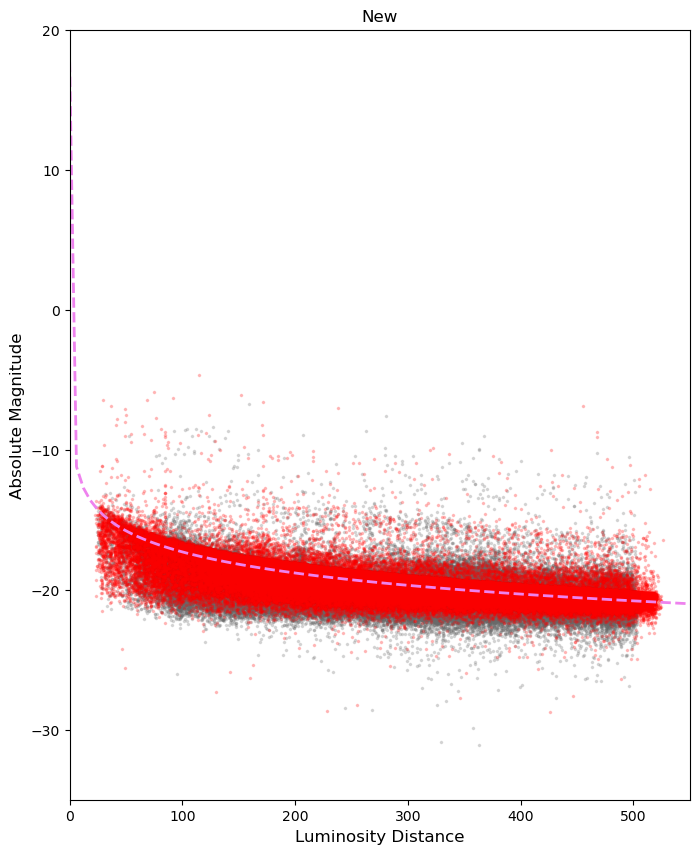

In [9]:
# plot M_r vs. z diagram!

# create a square image with four subplots (we will delete the top-right column later on)
fig, axs = plt.subplots(1, 1,
                        figsize = (8, 10)
                       )

axs.scatter(merged_new_walls['d_L'], 
            merged_new_walls['rabsmag_NSA'], 
            s = 10.0, 
            alpha = 0.2,
            c = 'dimgrey',
            marker = ".")

axs.scatter(merged_new_voids['d_L'], 
            merged_new_voids['rabsmag_NSA'], 
            s = 10.0,
            alpha = 0.2,
            c = 'red',
            marker = ".")

xcurve = np.linspace(0.00001, 600, 100)

# 30 -> conversion from megaparsecs to parsecs
ycurve = 17.7 - (5 * np.log10(xcurve)) + 5 - 30
axs.plot(xcurve, ycurve, color = "violet", linestyle = "dashed", linewidth = 2)

axs.set_ylabel('Absolute Magnitude', fontsize = 'large')
axs.set_xlabel('Luminosity Distance', fontsize = 'large')

axs.set_xlim([0.0, 550])
axs.set_ylim([-35.0, 20])

plt.title("New")

# fig.savefig('rabsmag_vs_Z_01-16-2023.png', dpi = 600)
plt.show()

In [10]:
merged_new_voids[['NSAID', 'RA']].to_csv('Files/new_voids_filtDL_' + timestamp() + '.csv', index = False)

In [11]:
merged_new_walls[['NSAID', 'RA']].to_csv('Filesnew_walls_filtDL_' + timestamp() + '.csv', index = False)